# CitiBike 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
files = glob.glob('data/*.csv')
df = pd.DataFrame()
columns = ['tripduration', 'starttime', 'start station id', 'end station id',
           'bikeid', 'usertype', 'birth year', 'gender']
for file in files:
    df_tmp = pd.read_csv(file, usecols=columns , nrows=1e4)
    df = pd.concat([df, df_tmp])

In [18]:
df.columns

Index(['tripduration', 'starttime', 'start station id', 'end station id',
       'bikeid', 'usertype', 'birth year', 'gender'],
      dtype='object')

files = glob.glob('data/*.csv')
df = pd.DataFrame()
columns = ['tripduration', 'starttime', 'start station id', 'end station id',
           'bikeid', 'usertype', 'birth year', 'gender']
for file in files:
    df_tmp = pd.read_csv(file, usecols=columns , nrows=1e4)
    df = pd.concat([df, df_tmp])

In [4]:
df.head()

,tripduration,starttime,start station id,end station id,bikeid,usertype,birth year,gender
0,840,2018-04-01 03:07:39.0700,72.0,379.0,31977,Subscriber,1973,1
1,1438,2018-04-01 07:20:02.2150,72.0,426.0,21403,Subscriber,1956,1
2,219,2018-04-01 08:11:14.4060,72.0,447.0,29081,Subscriber,1974,1
3,410,2018-04-01 08:52:32.3730,72.0,173.0,32130,Subscriber,1983,1
4,485,2018-04-01 09:37:34.3270,72.0,3159.0,30055,Subscriber,1978,1


In [5]:
df.describe()

,tripduration,start station id,end station id,bikeid,birth year,gender
count,1.200000e+05,119987.000000,119987.000000,120000.000000,120000.000000,120000.000000
mean,9.668182e+02,774.090685,1381.133881,26631.007108,1978.311542,1.165875
std,2.080159e+04,1242.836916,1401.008053,6191.597512,12.156792,0.522044
min,6.100000e+01,72.000000,72.000000,14529.000000,1885.000000,0.000000
25%,3.580000e+02,79.000000,345.000000,20373.000000,1969.000000,1.000000
50%,5.980000e+02,127.000000,477.000000,28456.000000,1981.000000,1.000000
75%,1.027000e+03,480.000000,3175.000000,31898.000000,1988.000000,1.000000
max,5.891578e+06,3715.000000,3715.000000,35688.000000,2002.000000,2.000000


In [6]:
df.shape

(120000, 8)

## Raised Questions
* In order to predict future number of trips, What factors effect ?
* Does the trip duration has any correlation with other variables ?
* Does 

In [7]:
df.starttime = pd.to_datetime(df.starttime)

## Univariate Exploration

In [8]:
base_color = sns.color_palette()[0]

(0, 5000)

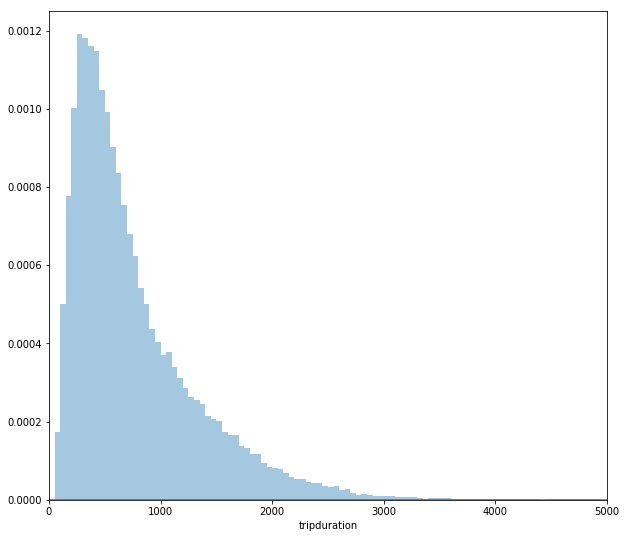

In [9]:
plt.figure(figsize=(10,9))
bins = np.arange(0, 5000, 50)
sns.distplot(df.tripduration, bins=bins, color=base_color);
plt.xlim(0,5000)

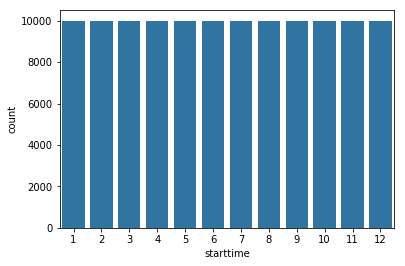

In [10]:
sns.countplot(df.starttime.dt.month, color=base_color);

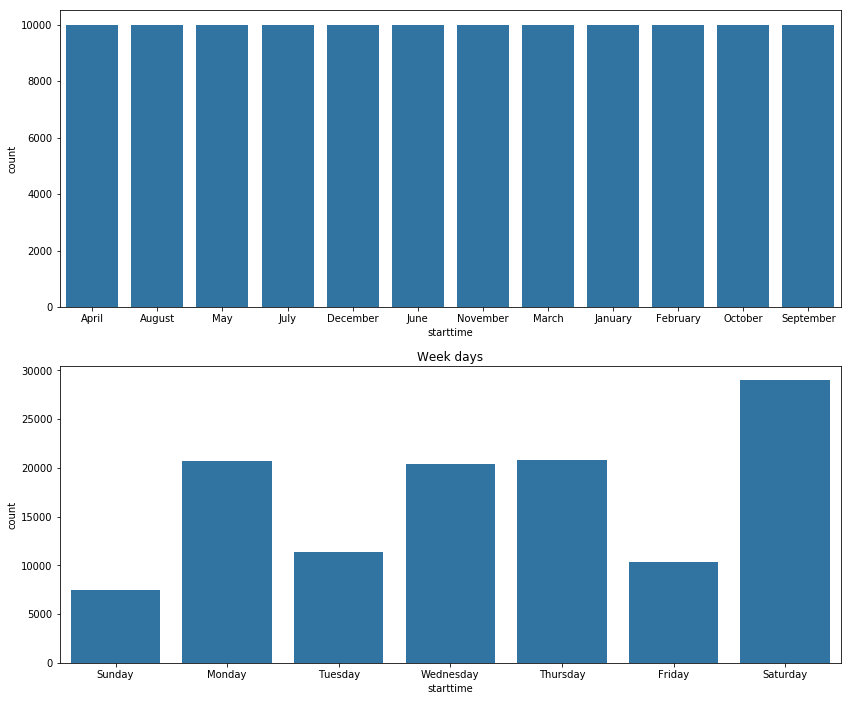

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,12))

sns.countplot(df.starttime.dt.month_name(), color=base_color, ax=ax[0]);
plt.title('month')

sns.countplot(df.starttime.dt.day_name(), color=base_color, ax=ax[1]);
plt.title('Week days')

plt.show()

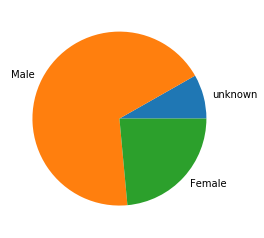

In [15]:
label = ['unknown', 'Male', 'Female']
gender_grouped = df.groupby('gender').size()
plt.pie(gender_grouped ,labels=label);

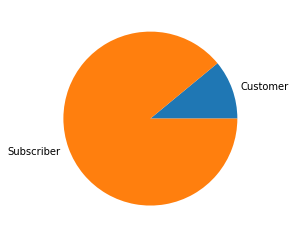

In [16]:
gender_grouped = df.groupby('usertype').size()
plt.pie(gender_grouped, labels=gender_grouped.index);

(1940, 2007)

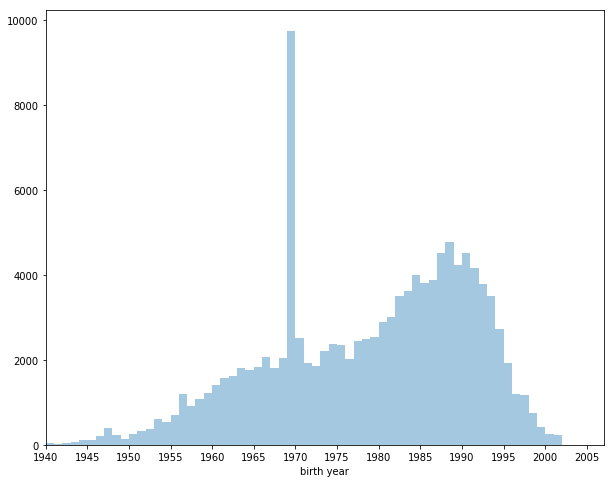

In [12]:
plt.figure(figsize=(10,8))
base_color = sns.color_palette()[0]
max_birth = df['birth year'].max()
bins = np.arange(1940, max_birth + 1, 1)
labels=np.arange(1940, max_birth + 5, 5)
sns.distplot(df['birth year'],bins=bins,kde=False, color=base_color);
plt.xticks(labels);
plt.xlim(1940, max_birth + 5)

The shape is sekead to left, with one big spike in year 1969.
After futhur investigaion, I found many customers sigend with 1969 birth year. This might be cuased by someone filled Null values with this specfic year.<br>
This quality issue must be solved to pr********

In [28]:
year_1970 = (df['birth year'] == 1970).sum().compute()
year_1968 = (df['birth year'] == 1968).sum().compute()
avg = (year_1968 + year_1970) / 2

year_1969 = (df['birth year'] == 1969).sum().compute()
year_1969 - avg

1374508.0

(1940, 2007)

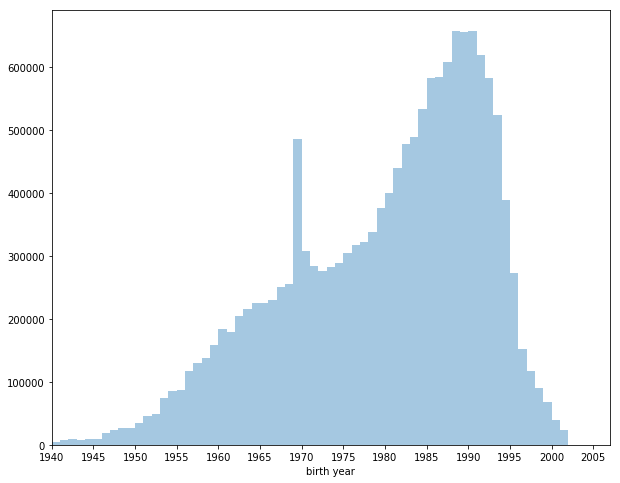

In [67]:
plt.figure(figsize=(10,8))
base_color = sns.color_palette()[0]
max_birth = df['birth year'].max().compute()
bins = np.arange(1940, max_birth + 1, 1)
labels=np.arange(1940, max_birth + 5, 5)
sns.distplot(df[df.usertype == 'Subscriber']['birth year'].compute(),bins=bins,kde=False, color=base_color);
plt.xticks(labels);
plt.xlim(1940, max_birth + 5)

## Bivirate exploration

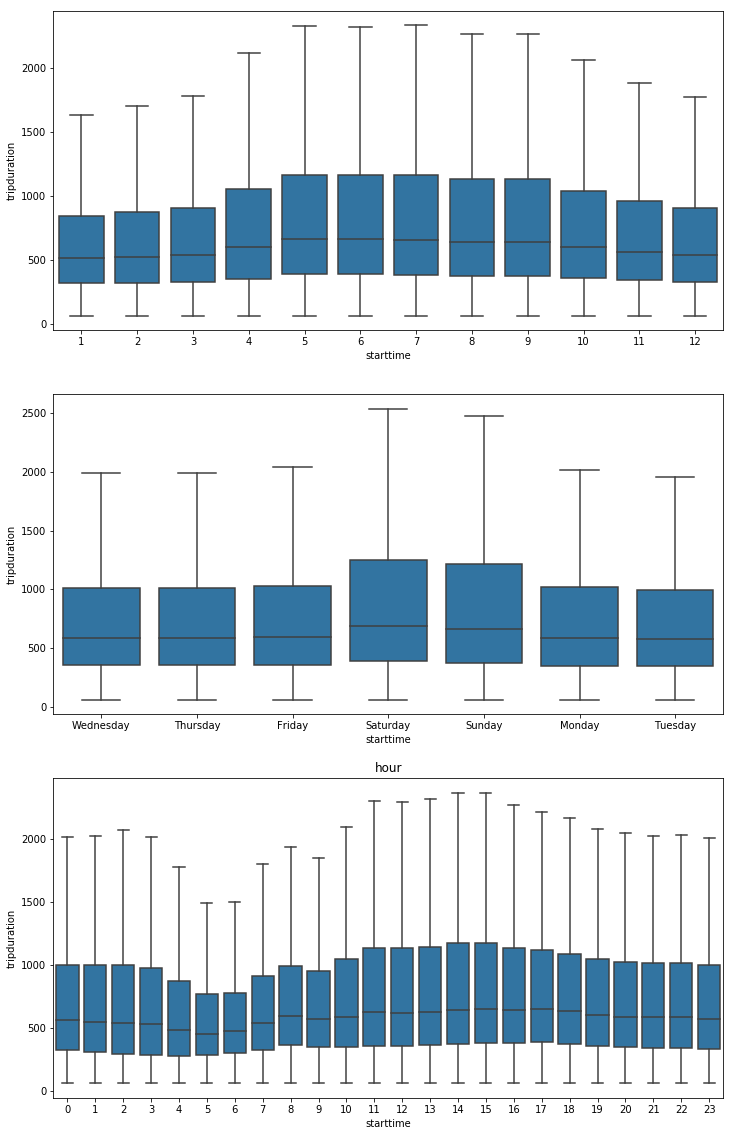

In [31]:
fig, ax = plt.subplots(nrows=3, figsize=(12,20))

plt.title('month')
sns.boxplot(df.starttime.dt.month, df.tripduration, showfliers=False, color=base_color, ax=ax[0])

plt.title('week day')
sns.boxplot(df.starttime.dt.day_name(), df.tripduration, showfliers=False, color=base_color, ax=ax[1])

plt.title('hour')
sns.boxplot(df.starttime.dt.hour, df.tripduration, showfliers=False, color=base_color, ax=ax[2])

plt.show()

/home/srap/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


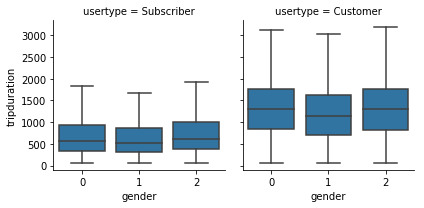

In [18]:
g = sns.FacetGrid(col='usertype', data=df)
g.map(sns.boxplot, 'gender', 'tripduration', data=df, color=base_color, showfliers=False);

g = sns.FacetGrid(col='usertype', row='gender', data=df)
g.map(sns.barplot, x='birth year', y='tripduration', data=df)

In [21]:
gender_df = df.groupby(['start station id','end station id','gender']). tripduration.mean().reset_index()
gender_df

,start station id,end station id,gender,tripduration
0,72.0,72.0,0,1927.314286
1,72.0,72.0,1,1080.270175
2,72.0,72.0,2,1742.209302
3,72.0,79.0,0,1892.000000
4,72.0,79.0,1,1674.720000
5,72.0,79.0,2,1929.000000
6,72.0,127.0,0,1543.000000
7,72.0,127.0,1,1246.736842
8,72.0,127.0,2,1533.045455
9,72.0,128.0,0,1695.000000


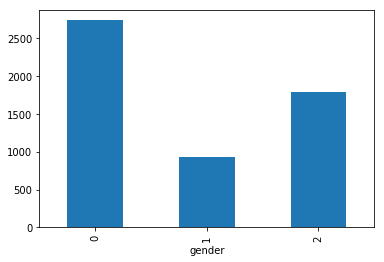

In [26]:
gender_df.groupby('gender').tripduration.mean().plot('bar')